# Notebook containing runs for left fixed right free scenario

## Constants definitions

In [1]:
L = 10; % length = 10 m
b = 0.1; % width = 10 cm
d = 0.05; % height = 5 cm
E = 2*10^11; % Young�s modulus for steel = 200 GPa = 2x10^11 Pa
I = b*d^3/12; % second moment of inertia
rho = 7850; % mass density of steel = 7850 kg/m^3
g = 9.81; % acceleration due to gravity = 9.81 m/s^2
w = rho*b*d*g; % weight of the beam per unit length (will be our f)

## Class Project Version

In [3]:
n = 10; % number of subintervals on [0, L]
h = L/n; % discretization spacing
N = n + 1; % number of unknowns to be solved for
A = sparse(N,N); % generating a sparse matrix

% Define the RHS of the system
f = -h^4/(E*I) * w * ones(N, 1);
f(1) = 0;
f(N) = f(N)/2;

% Creating diagonals of the matrix
for i=3:N - 2
    A(i,i) = 6;
    A(i,i-1) = A(i,i+1) = -4;
    A(i,i-2) = A(i,i+2) = 1; 
endfor

% Left end
A(1,1) = 1;
A(2,2) = 7;
A(1,2) = 0;
A(1,3) = 0;
A(2,1) = 0;
A(3,1) = 0;
A(2,3) = -4;
A(2,4) = 1;
% Right end
A(N,N) = 1;
A(N-1,N-1) =  5;
A(N-1,N) = -2;
A(N-2,N) = 1;
A(N, N-1) = -2;
A(N, N-2) = 1;
A(N-1,N-2) = -4;
A(N-1,N-3) = 1;

% Solve for y
y = A\f;
x = (0:h:L)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(6.*L^2 - 4.*L*x + x.^2);
ErrMax = max(abs(y-y_exact))


ErrMax =  0.023103


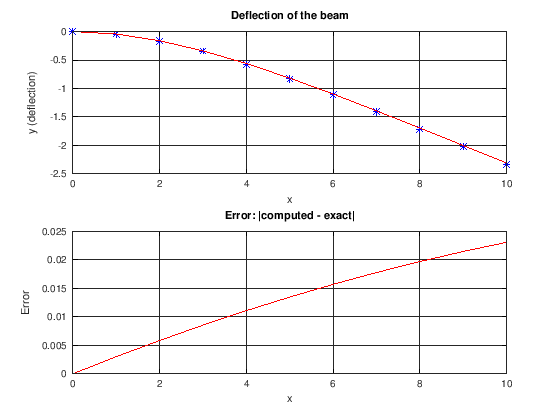

In [11]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;

## Sauer First Edition

In [8]:
% Since in Sauer's second edition does not use a pentadiagonal matrix, we must use a more standard approach
% Filling and solving our matrix.
format long


n = 10; % number of subintervals on [h, L]
A = sparse(n,n);
%A = [];
h = L/(n+1); % discretization spacing
N = n+1; % number of unknowns to be solved for 

% Define the RHS of the system
f = -h^4/(E*I) * w * ones(N, 1);
%f(1) = f(N) = 0;

% left end point
A(1,1) = 12;
A(1,2) = -6;
A(1,3) = (4/3);

% Creating diagonals of the matrix
for i=1:N
    for j = 1:N
        % adding the main diagonal
        if i == j && i > 1 && i <= N - 1
            A(i,j) = 6;
        endif
        % adding the first superdiagonal and subdiagonal
        if abs(i - j) == 1 && i > 1 && i <= N - 1
            A(i,j) = -4;
        endif
        % adding the second superdiagonal and subdiagonal
        if abs(i - j) == 2 && i > 1 && i <= N - 1
            A(i,j) = 1;
        endif
    endfor
endfor

% right endpoint
A(N,N) = (12/25);
A(N-1,N) = (-43/25);
A(N,N-1) = (-24/25);
A(N-1,N-1) = (111/25);
A(N,N-2) = (12/25);
A(N-1,N-2) = (-93/25);

% Finding y
y = A\f;

% Plots
x = (h:h:L)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(6.*L^2 - 4.*L*x + x.^2);
ErrMax = max(abs(y-y_exact))

ErrMax =  0.598247851239307


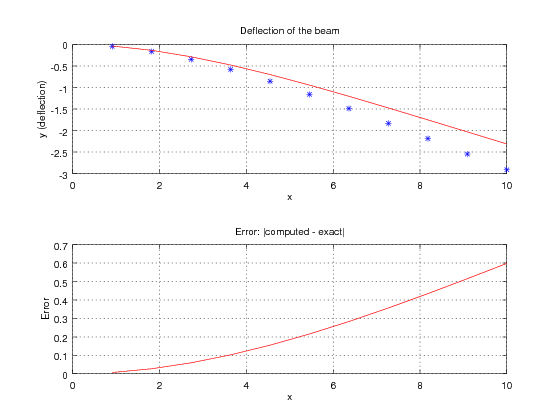

In [9]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;

## Sauer Second Edition

In [10]:
n = 10; % number of subintervals on [h, L]
h = L/n; % discretization spacing
N = n; % number of unknowns to be solved for
%A = sparse(N,N);
A = [];
% Define the RHS of the system
f = -h^4/(E*I) * w * ones(N, 1);
% Creating diagonals of the matrix
for i=3:N - 2
    A(i,i) = 6;
    A(i,i-1) = A(i,i+1) = -4;
    A(i,i-2) = A(i,i+2) = 1; 
endfor

% Leftside
A(1,1) = 16;
A(1,2) = -9;
A(1,3) = (8/3);
A(1,4) = (-1/4);
A(2,1) = A(2,3) = -4;
A(2,2) = 6;
A(2,4) = 1;

% Rightside
A(N,N-3) = -(12/17);
A(N,N-2) = (96/17);
A(N,N-1) = -(156/17);
A(N,N) = (72/17);
A(N-1,N) = -(28/17);
A(N-1,N-1) = (72/17);
A(N-1,N-2) = -(60/17);
A(N-1,N-3) = (16/17);
% Finding y
y = A\f;

% Plots
x = (h:h:L)';
y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(6.*L^2 - 4.*L*x + x.^2);
ErrMax = max(abs(y-y_exact))

ErrMax =  1.72807073999954


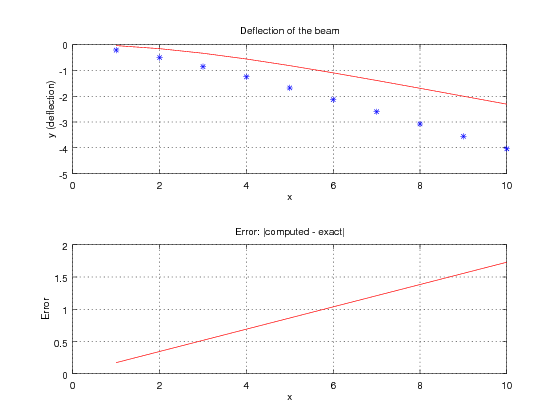

In [4]:
subplot(2,1,1);
plot(x, y, "b*", x, y_exact, "r")
title('Deflection of the beam');
xlabel('x'); ylabel('y (deflection)');
grid on;
subplot(2,1,2);
plot(x, abs(y - y_exact), "r")
title('Error: |computed - exact|');
xlabel('x'); ylabel('Error');
grid on;

# trial runs (n = 10,20,40,80,160,320,640,1280)

## Class Project Version (trials)

In [5]:
n = 10;

for j=1:11
    n
    h = L/n; % discretization spacing
    N = n + 1; % number of unknowns to be solved for
    A = sparse(N,N); % generating a sparse matrix

    % Define the RHS of the system
    f = -h^4/(E*I) * w * ones(N, 1);
    f(1) = 0;
    f(N) = f(N)/2;

    % Creating diagonals of the matrix
    for i=3:N - 2
        A(i,i) = 6;
        A(i,i-1) = A(i,i+1) = -4;
        A(i,i-2) = A(i,i+2) = 1; 
    endfor

    % Left end
    A(1,1) = 1;
    A(2,2) = 7;
    A(1,2) = 0;
    A(1,3) = 0;
    A(2,1) = 0;
    A(3,1) = 0;
    A(2,3) = -4;
    A(2,4) = 1;
    % Right end
    A(N,N) = 1;
    A(N-1,N-1) =  5;
    A(N-1,N) = -2;
    A(N-2,N) = 1;
    A(N, N-1) = -2;
    A(N, N-2) = 1;
    A(N-1,N-2) = -4;
    A(N-1,N-3) = 1;

    % Solve for y
    y = A\f;
    x = (0:h:L)';
    y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(6.*L^2 - 4.*L*x + x.^2);
    ErrMax = max(abs(y-y_exact))
    n = n * 2;
endfor


n =  10
ErrMax =  0.023103
n =  20
ErrMax =  0.0057756
n =  40
ErrMax =  0.0014439
n =  80
ErrMax =  0.00036098
n =  160
ErrMax =  0.000090245
n =  320
ErrMax =  0.000022605
n =  640
ErrMax =  0.0000057606
n =  1280
ErrMax =  0.0000018213
n =  2560
ErrMax =  0.00020304
n =  5120
ErrMax =  0.00064788
n =  10240
ErrMax =  0.021904


## Sauer first edition (trials)

In [4]:
n = 10;

for j=1:11
    n
    h = L/n; % discretization spacing
    N = n; % number of unknowns to be solved for
    A = sparse(N,N); % generating a sparse matrix

    % Define the RHS of the system
    f = -h^4/(E*I) * w * ones(N, 1);

    % Creating diagonals of the matrix
    for i=3:N - 2
        A(i,i) = 6;
        A(i,i-1) = A(i,i+1) = -4;
        A(i,i-2) = A(i,i+2) = 1; 
    endfor

    % Leftside
    A(1,1) = 12;
    A(1,2) = -6;
    A(1,3) = (4/3);
    A(2,1) = A(2,3) = -4;
    A(2,2) = 6;    
    A(2,4) = 1;

    % right endpoint
    A(N,N) = (12/25);
    A(N-1,N) = (-43/25);
    A(N,N-1) = (-24/25);
    A(N-1,N-1) = (111/25);
    A(N,N-2) = (12/25);
    A(N-1,N-2) = (-93/25);
    A(N-1,N-3) = 1;
    % Solve for y
    y = A\f;
    x = (h:h:L)';
    y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(6.*L^2 - 4.*L*x + x.^2);
    ErrMax = max(abs(y-y_exact))
    n = n * 2;
endfor

n =  10
ErrMax =  0.66227
n =  20
ErrMax =  0.31959
n =  40
ErrMax =  0.15690
n =  80
ErrMax =  0.077730
n =  160
ErrMax =  0.038685
n =  320
ErrMax =  0.019297
n =  640
ErrMax =  0.0096371
n =  1280
ErrMax =  0.0048098
n =  2560
ErrMax =  0.0024800
n =  5120
ErrMax =  0.00041564
n =  10240
ErrMax =  0.013762


## Sauer second edition (trials)

In [6]:
n = 10;

for j=1:11
    n
    h = L/n; % discretization spacing
    N = n; % number of unknowns to be solved for
    A = sparse(N,N); % generating a sparse matrix

    % Define the RHS of the system
    f = -h^4/(E*I) * w * ones(N, 1);

    % Creating diagonals of the matrix
    for i=3:N - 2
        A(i,i) = 6;
        A(i,i-1) = A(i,i+1) = -4;
        A(i,i-2) = A(i,i+2) = 1; 
    endfor

    % Leftside
    A(1,1) = 12;
    A(1,2) = -6;
    A(1,3) = (4/3);
    A(2,1) = A(2,3) = -4;
    A(2,2) = 6;    
    A(2,4) = 1;

    % right endpoint
    A(N,N) = (72/17);
    A(N-1,N) = (-28/17);
    A(N,N-1) = (-156/17);
    A(N-1,N-1) = (72/17);
    A(N,N-2) = (96/17);
    A(N-1,N-2) = (-60/17);
    A(N,N-3) = (-12/17);
    A(N-1,N-3) = (16/17);
    
    % Solve for y
    y = A\f;
    x = (h:h:L)';
    y_exact = -b*d*rho*g/(24*E*I)*x.^2.*(6.*L^2 - 4.*L*x + x.^2);
    ErrMax = max(abs(y-y_exact))
    n = n * 2;
endfor

n =  10
ErrMax =   3.4595e-013
n =  20
ErrMax =   5.4046e-013
n =  40
ErrMax =   2.3528e-012
n =  80
ErrMax =  0.00000000022012
n =  160
ErrMax =  0.0000000064783
n =  320
ErrMax =  0.0000000022504
n =  640
ErrMax =  0.00000027627
n =  1280
ErrMax =  0.0000073331
n =  2560
ErrMax =  0.000071871
n =  5120
ErrMax =  0.00079238
n =  10240
ErrMax =  0.014763
